In [19]:
from matplotlib import pyplot as plt

from config import NTURNS, BEAM, SAMPLE_INDEX, DENOISED_INDEX
from rdt_constants import NORMAL_SEXTUPOLE_RDTS
from rdt_functions import (
    get_rdts_from_optics_analysis,
    get_tbt_path,
    run_harpy,
)

cleaned_path = get_tbt_path(beam=BEAM, nturns=NTURNS, index=DENOISED_INDEX)
noisy_path = get_tbt_path(beam=BEAM, nturns=NTURNS, index=SAMPLE_INDEX)
nonoise_path = get_tbt_path(beam=BEAM, nturns=NTURNS, index=-1)

In [ ]:

run_harpy(BEAM, cleaned_path, clean=False)
print("Done running Harpy on cleaned data")

Done running Harpy on cleaned data


In [21]:

run_harpy(BEAM, noisy_path, clean=True)
print("Done running Harpy on noisy data (also cleaned this one)")

Done running Harpy on noisy data (also cleaned this one)


In [22]:

run_harpy(BEAM, nonoise_path, clean=False)
print("Done running Harpy on no noise data")

Done running Harpy on no noise data


In [23]:

print("Running optics analysis on the data")
cleaned_dfs = get_rdts_from_optics_analysis(beam=BEAM, tbt_path=cleaned_path)
hcleaned_dfs = get_rdts_from_optics_analysis(beam=BEAM, tbt_path=noisy_path)
nonoise_rdts = get_rdts_from_optics_analysis(beam=BEAM, tbt_path=nonoise_path)
print("Done running optics analysis")

Running optics analysis on the data


NaNs found, weights are not used.
NaNs found, weights are not used.
Zeros found, weights are not used.
Zeros found, weights are not used.
Zeros found, weights are not used.
Zeros found, weights are not used.
NaNs found, weights are not used.
NaNs found, weights are not used.
Zeros found, weights are not used.
Zeros found, weights are not used.
Zeros found, weights are not used.
Zeros found, weights are not used.


Tunes for beam 1: [np.float64(0.279821754984), np.float64(0.30994415622)]
Tunes for beam 1: [np.float64(0.279821412813), np.float64(0.309944037646)]


Zeros found, weights are not used.
Zeros found, weights are not used.
NaNs found, weights are not used.
NaNs found, weights are not used.
Zeros found, weights are not used.
Zeros found, weights are not used.
Zeros found, weights are not used.
Zeros found, weights are not used.
NaNs found, weights are not used.
NaNs found, weights are not used.
Zeros found, weights are not used.
Zeros found, weights are not used.
Zeros found, weights are not used.
Zeros found, weights are not used.


Tunes for beam 1: [np.float64(0.279821395874), np.float64(0.309944152832)]
Done running optics analysis


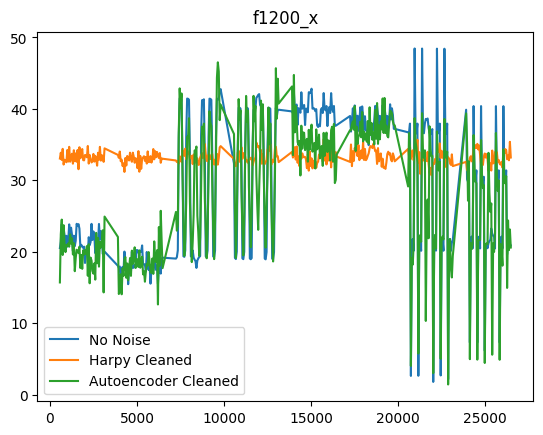

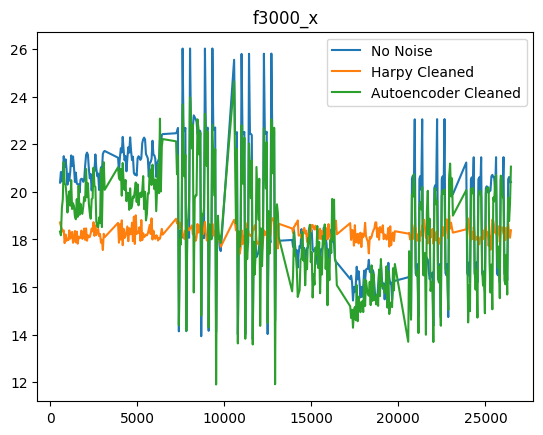

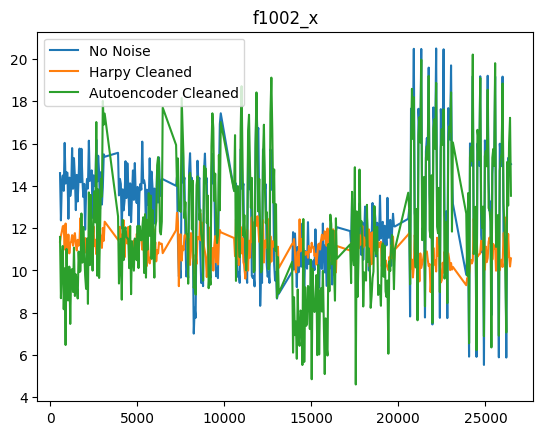

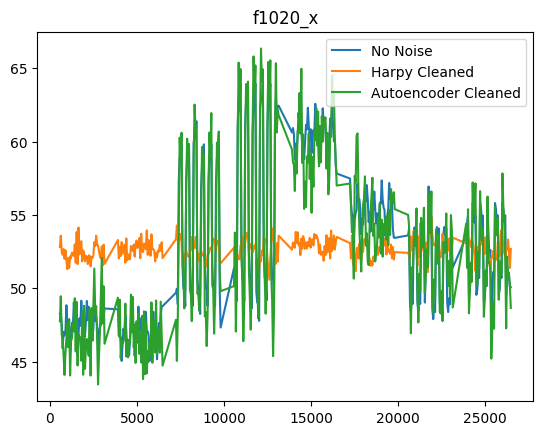

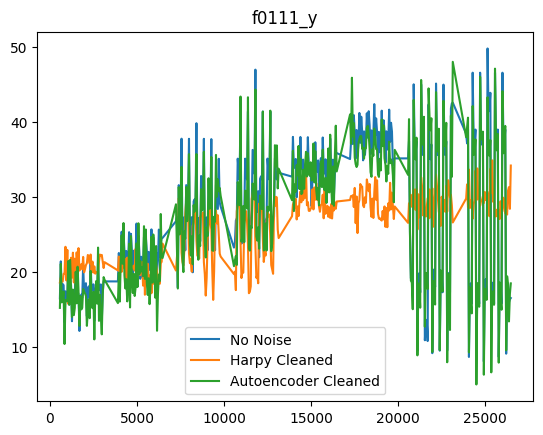

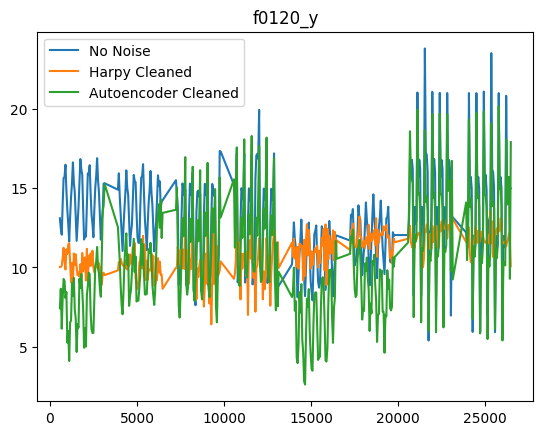

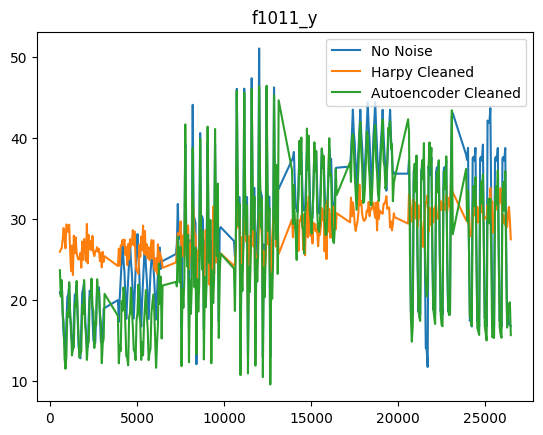

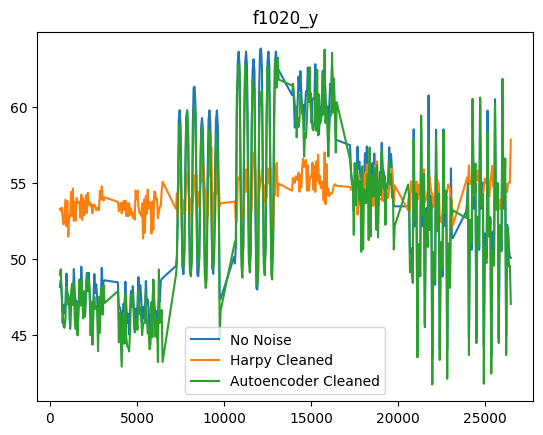

In [24]:

for rdt in NORMAL_SEXTUPOLE_RDTS:
    plt.figure()
    plt.plot(nonoise_rdts[rdt]["S"], nonoise_rdts[rdt]["AMP"], label="No Noise")
    plt.plot(hcleaned_dfs[rdt]["S"], hcleaned_dfs[rdt]["AMP"], label="Harpy Cleaned")
    plt.plot(cleaned_dfs[rdt]["S"], cleaned_dfs[rdt]["AMP"], label="Autoencoder Cleaned")
    plt.title(rdt)
    plt.legend()
plt.show()